In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


In [9]:
csv_file_path = 'G:\projectMachineLearningTest\mental_health.csv'

data = pd.read_csv(csv_file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


c:\Users\tranh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.24845960502211528


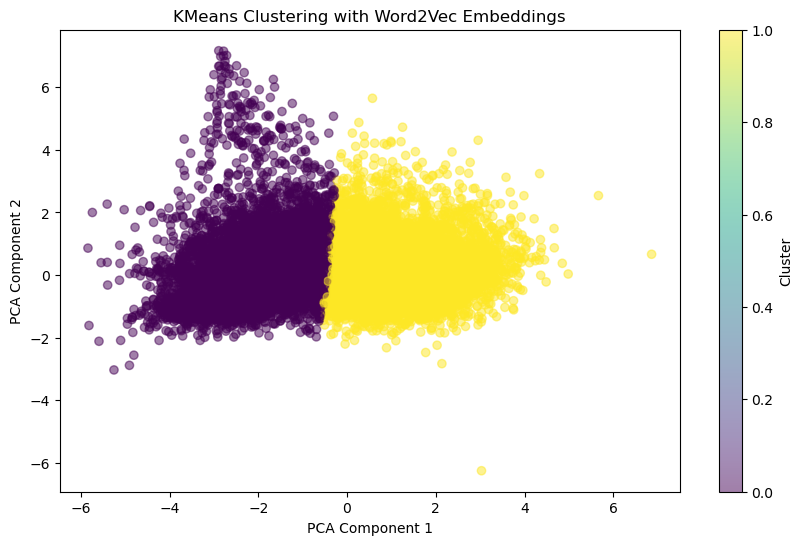

In [10]:
sentences = [text.split() for text in data['text']]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_word2vec_embedding(text):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

embeddings = np.array([get_word2vec_embedding(text) for text in data['text']])

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(embeddings)

clusters = kmeans.predict(embeddings)

silhouette_avg = silhouette_score(embeddings, clusters)
print(f'Silhouette Score: {silhouette_avg}')

data['cluster'] = clusters

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering with Word2Vec Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()